<a href="https://colab.research.google.com/github/mechhector/visao_computacional20212/blob/main/trabalho1/q5_prewitt_DIP_20212.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[[-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]]
[[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]]
Dimensões da Imagem: (133, 277)


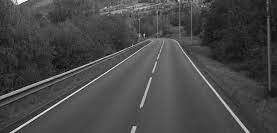

In [ ]:
# PDI 2021.2 Trabalho 1 
# Hector Leonardo Mota Moreira


# Laplacian Operator


import numpy as np
import cv2
import matplotlib.pyplot as plt 
from google.colab.patches import cv2_imshow


# ========= Loading the image =========

img = cv2.imread('/content/drive/MyDrive/Computer_Vision/img_src/road_peuqeno.jpeg', 0)


# ========= Kernel Dimensions ========= 

k = 3

c = (int (k/2)) # Just to simplify 

# ======= Number of Iterations ======== 

n = 1

# =========== Image Content =========== 

image_content = 'road_pequeno'

# ======== Creating the Kernels ========

horizontal_prewitt_kernel = np.ones((k,k))

for x in range(k):
  horizontal_prewitt_kernel [(x,0)] = -1
  
for y in range (k):
  horizontal_prewitt_kernel [(y,1)] = 0

print(horizontal_prewitt_kernel)

vertical_prewitt_kernel = np.ones((k,k))

for i in range (k):
  vertical_prewitt_kernel [(0,i)] = -1
for j in range (k):
  vertical_prewitt_kernel [(1,j)] = 0

print(vertical_prewitt_kernel)

print ('Dimensões da Imagem:', img.shape)

cv2_imshow(img)

In [ ]:
# ============== Padding ==============

line, column = (img.shape) 

holdpdd = np.zeros( ((line + 2 * c), (column + 2 * c)) )  

new_line, new_column = (holdpdd.shape)

holdpdd [ c : new_line - c , c : new_column - c ] = img # Based on the Professor Navar's lecture.


print(img.shape)
print (holdpdd.shape)

(133, 277)
(135, 279)


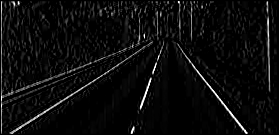

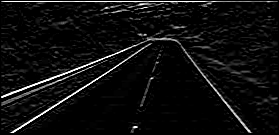

(135, 279) (133, 277)


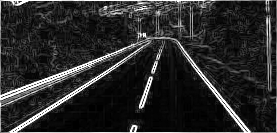

True

In [ ]:
# ============ Convolution ============ 

holdpdd_copy_horizontal = holdpdd.copy() # Based on the Professor Navar's lecture.

holdpdd_copy_vertical = holdpdd.copy()


# Horizontal Mask

for x in range (c,holdpdd_copy_horizontal.shape[0]-c):
  for y in range(c,holdpdd_copy_horizontal.shape[1]-c):
      
    lol = holdpdd[ x - c:x + c + 1 , y - c: y + c + 1 ]
      
    horizontal_mask = (lol*horizontal_prewitt_kernel).sum()
    
    holdpdd_copy_horizontal[x,y] = horizontal_mask
 
# Vertical Mask

for x in range (c,holdpdd_copy_vertical.shape[0]-c):
  for y in range(c,holdpdd_copy_horizontal.shape[1]-c):
      
    lol = holdpdd[ x - c:x + c + 1 , y - c: y + c + 1 ]
      
    vertical_mask = (lol*vertical_prewitt_kernel).sum()
    
    holdpdd_copy_vertical[x,y] = vertical_mask


cv2_imshow(holdpdd_copy_horizontal) 

cv2_imshow(holdpdd_copy_vertical)


# Prewitt image adjustment

prewitt_image = np.sqrt((holdpdd_copy_horizontal**2 + holdpdd_copy_vertical**2))

prewitt_adjusted = prewitt_image.copy()

for i in range (0, prewitt_adjusted.shape[0]):
  for j in range (0, prewitt_adjusted.shape[1]):

    if prewitt_adjusted[(i,j)] > 255:

      prewitt_adjusted[(i,j)] = 255

    else:
      prewitt_adjusted[(i,j)] = round(prewitt_adjusted[(i,j)])

final_image = np.zeros((line,column))

final_image = prewitt_adjusted [ c : new_line - c , c : new_column - c ] 

print(prewitt_image.shape, final_image.shape)

cv2_imshow(final_image)



file_name = '/content/drive/MyDrive/Computer_Vision/Trabalho_1 /Q5_Prewitt_Filter/{}_prewitt_filter.png'

ph_name = '/content/drive/MyDrive/Computer_Vision/Trabalho_1 /Q5_Prewitt_Filter/{}_ph_prewitt_filter.png'

pv_name = '/content/drive/MyDrive/Computer_Vision/Trabalho_1 /Q5_Prewitt_Filter/{}_pv_prewitt_filter.png'

#cv2.imwrite(ph_name.format(image_content),holdpdd_copy_horizontal)

#cv2.imwrite(pv_name.format(image_content),holdpdd_copy_vertical)

cv2.imwrite(file_name.format(image_content),final_image)